# 第三章：Pandas---Series与DataFrame

# 3.1 Pandas 统计分析库 

pandas是基于python的数据分析工具包

导入pandas库(一般同时导入np)：

import pandas as pd

import numpy as np 

Pandas设计了两种新型数据结构:

Series数据结构：一维数据

DataFrame数据结构：二维数据和高维数据

为了方便使用，将其导入本地命名空间：

from pandas import Series,DataFrame

# 3.2 Series 数据结构

Series是类似于数组的一维数据结构，由索引和值(任意类型的数据)两个相关联的数组组成
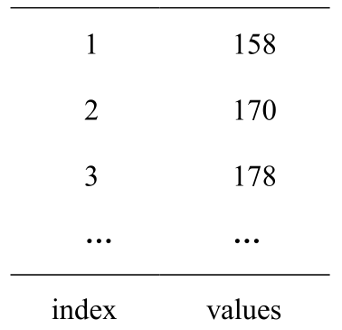

Series创建格式： Series([值]，index=[索引]) 或借助字典： Series({'键':值})

In [10]:
#例 3.2.1 创建班里3名同学python成绩的Series对象，以名字为索引

import pandas as pd
import numpy as np
from pandas import Series,DataFrame

python_scores1=Series([4.0,4.0,2.7],index=['Jerry','Zhou','Tom'])
python_scores2=Series({'Jerry':4.0,'Zhou':4.0,'Tom':2.7})

print(python_scores1,'\n\n',python_scores2)

Jerry    4.0
Zhou     4.0
Tom      2.7
dtype: float64 

 Jerry    4.0
Zhou     4.0
Tom      2.7
dtype: float64


# 3.3 Series对象数据访问

Series 既可以通过值的位置序号，又可以通过值对应的索引来访问数据，选取方式如下：

根据位置访问：

当索引表示数字时：a[位置序号]  
当索引是数字时：a.ioc[位置序号]

根据索引访问：a[索引]

条件筛选访问：a[条件]

In [18]:
#例 3.3.1 查询Jerry的python成绩

Jerry_python_score=python_scores1['Jerry']
print(Jerry_python_score)

4.0


In [24]:
#例 3.3.2 查询Jerry与Zhou的python成绩

JerryZhou_python_score=python_scores1[['Jerry','Zhou']]
print(JerryZhou_python_score)

Jerry    4.0
Zhou     4.0
dtype: float64


In [34]:
#例 3.3.3 查询位置序号为0和2的同学的python成绩

No02_python_score=python_scores1[[0,2]]
print(No13_python_score)

Jerry    4.0
Tom      2.7
dtype: float64


In [35]:
#例 3.3.4 查询位置序号为0和1和2的同学的python成绩

No012_pythn_score=python_scores1[0:3]
print(No012_pythn_score)

Jerry    4.0
Zhou     4.0
Tom      2.7
dtype: float64


# 3.4 Series对象相关操作

修改值： a[索引]=新值 或 a[位置]=新值

修改索引：a.index=[新索引] 即输入一个新列表

增添：
Series不能直接添加新数据,需要将新数据单独创建为一个Series对象，然后用append()函数将其与原先的Series对象相加，产生一个新Series对象

这里原Series没有发生变化，需要通过赋值给其他变量才能保存结果

删除：原理同增添，使用函数为drop()

In [45]:
#例 3.4.1 将Tom的python成绩修改为1.0，并增添Qq的python成绩3.3

python_scores1['Tom']=1.0

Qq_python_score=Series([3.3],index=['Qq'])
New_python_scores=python_scores1.append(Qq_python_score)

print(New_python_scores)

Jerry    4.0
Zhou     4.0
Tom      1.0
Qq       3.3
dtype: float64


/var/folders/vn/k5wyqkmn2xx8_7f1wq63v66h0000gn/T/ipykernel_22333/1367256102.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  New_python_scores=python_scores1.append(Qq_python_score)


In [46]:
#例 3.4.2 修改索引为1，2，3，4

New_python_scores.index=[1,2,3,4]
print(New_python_scores)

1    4.0
2    4.0
3    1.0
4    3.3
dtype: float64


# 3.5 DataFrame数据结构

DataFrame是类似表格的二维数据结构，由 行索引，列索引，值 三部分组成，其中值由列表或二维ndarray对象构成，行列索引均保存为一维ndarray对象

DataFrame任意一行或一列数据都可视为一个Series对象

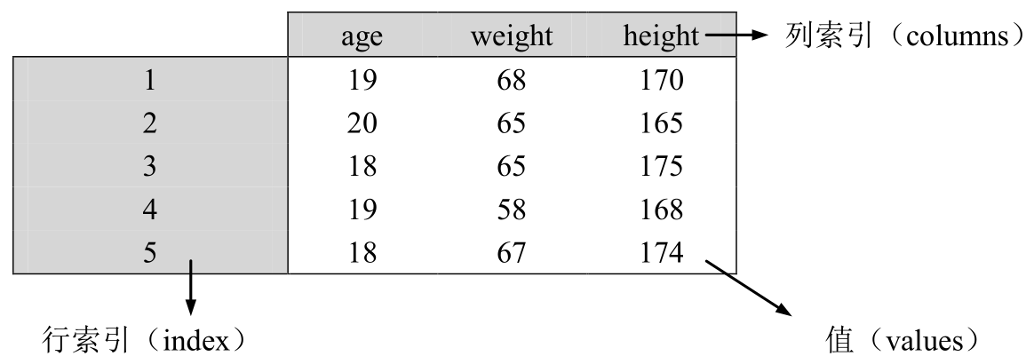

DataFrame创建格式：DataFrame(值，index = [行索引]，columns=[列索引] )


In [48]:
#创建3×3的DataFrame数据对象：数据内容为1~9；行索引为字符a、b、c；列索引为字符串one、two、three。

import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data=np.arange(1,10).reshape(3,3)
objective=DataFrame(data,index=['a','b','c'],columns=['one','two','three'])

print(objective)

   one  two  three
a    1    2      3
b    4    5      6
c    7    8      9


# 3.6 DataFrame对象数据访问

DataFrame 既可以通过值的位置序号，又可以通过值对应的行列索引来访问数据，选取方式如下：

根据位置访问：a.iloc[行位置序号,列位置序号]  

根据索引访问：

选取某列：a[列索引]

选取某行某列：a.loc[行索引,列索引]

条件筛选访问： （通常列为特征项，故一般情况下为已知列的索引或位置序号下去选择行）

由索引构造条件：a.loc[行索引条件,列索引]

由位置序号构造条件：a.iloc[行位置序号条件,列位置序号]

通常列为特征项，故可先使用列创造出布尔型筛选条件，并应用于行

In [50]:
#例 3.6.1 查询a行one列的数据

print(objective.loc['a','one'])

1


In [52]:
#例 3.6.2 查询a行和c行的one列与three列数据

print(objective.loc[['a','c'],['one','three']]) #不同于二维ndarray的需要双层切片

   one  three
a    1      3
c    7      9


In [54]:
#例 3.6.3 查询所有行的one列与three列

print(objective.loc[:,['one','three']])

   one  three
a    1      3
b    4      6
c    7      9


In [56]:
#等同于查询one列与three列

print(objective[['one','three']])

   one  three
a    1      3
b    4      6
c    7      9


In [59]:
#例 3.6.4 查询位置序号为0行和1行的所有列

print(objective.iloc[[0,1],:])

   one  two  three
a    1    2      3
b    4    5      6


In [60]:
#列的：号可以省去

print(objective.iloc[[0,1]])

   one  two  three
a    1    2      3
b    4    5      6


In [61]:
#例 3.6.5 筛选出第one列中值大于2的所有行数据

#选中True的行
bool_objective=objective['one']>2
print(bool_objective)

a    False
b     True
c     True
Name: one, dtype: bool


In [64]:
print(objective.loc[bool_objective,'one'])  #iloc + 列位置序号的组合似乎不行

b    4
c    7
Name: one, dtype: int64


# 3.7 DataFrame对象相关操作

修改值： a[列索引]=标量/[新值]  a.iloc[行位置序号，：]=标量[新值]（为某列/某行用列表重新赋值）

增添：
DataFrame能直接添加新的列,但不支持直接增加新的行（后续章节介绍添加行的方法）
直接添加新的列：a[列索引]=[新值]（用列表增添）

删除：使用函数drop(行/列索引，axis=0/1)，通过参数axis指明删除行还是列（=0删行，=1删列）

增添删除都不改变原始对象的值，如需直接删除原始对象的值，可在axis后增添参数implaceTrue

In [72]:
#例3.7.1 利用下方给出的数据,修改1，2，3同学的weight为80，42，71
"""
data = [[19,170,68],[20,165,65],[18,175,65]]
students = DataFrame(data, index=[1,2,3], columns=['age','height','weight'])  
"""

data = [[19,170,68],[20,165,65],[18,175,65]]
students = DataFrame(data, index=[1,2,3], columns=['age','height','weight'])  
print(students)

   age  height  weight
1   19     170      68
2   20     165      65
3   18     175      65


In [74]:
students['weight'] = [80,43,71]     
print(students)

   age  height  weight
1   19     170      80
2   20     165      43
3   18     175      71


In [75]:
#例3.7.2 修改1同学的各数据为17，192，100

students.iloc[0,:]=[17,192,100]
print(students)

   age  height  weight
1   17     192     100
2   20     165      43
3   18     175      71


In [76]:
#例3.7.3  增添“expense”数据2000，2500，3000

students['expense']=[2000,2500,3000]
print(students)

   age  height  weight  expense
1   17     192     100     2000
2   20     165      43     2500
3   18     175      71     3000


In [83]:
#例3.7.4  删除1与2学生的所有数据

print(students.drop([1,2],axis=0))

   age  height  weight  expense
3   18     175      71     3000


In [84]:
#例3.7.5  删除所有学生的weight数据

print(students.drop('weight',axis=1))

   age  height  expense
1   17     192     2000
2   20     165     2500
3   18     175     3000


In [86]:
#筛选expense<2500数据，重新赋值为2500

students.loc[students['expense']<2500, 'expense' ] = 2500
print(students)

   age  height  weight  expense
1   17     192     100     2500
2   20     165      43     2500
3   18     175      71     3000
